In [48]:
import pandas as pd
# filer warnings
import warnings
warnings.filterwarnings("ignore")

In [49]:
df = pd.read_csv(r'D:\predictive maintenence\data\ai4i2020.csv')
df.head(2)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0


In [50]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [51]:
failure_modes = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

df['failure_mode_count'] = df[failure_modes].sum(axis=1)

print(df['failure_mode_count'].value_counts())
print(f"Max simultaneous failure modes: {df['failure_mode_count'].max()}")


failure_mode_count
0    9652
1     324
2      23
3       1
Name: count, dtype: int64
Max simultaneous failure modes: 3


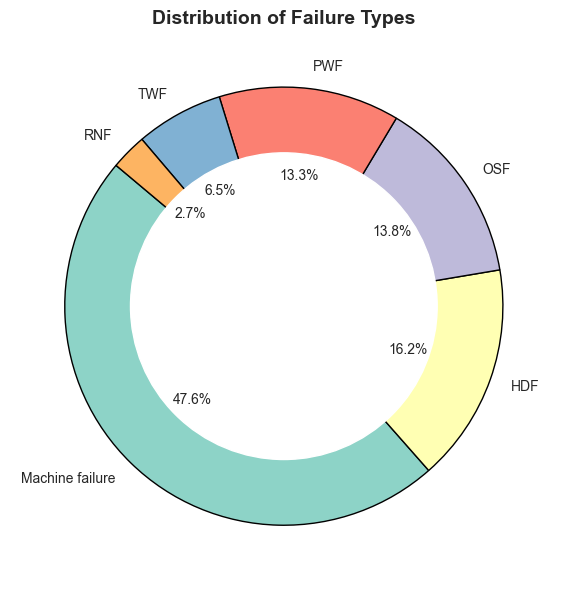

In [52]:
import matplotlib.pyplot as plt

# Targets
targets = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Count positives for each target
target_counts = df[targets].sum().sort_values(ascending=False)

# Setup pie chart
fig, ax = plt.subplots(figsize=(8, 6))

colors = plt.get_cmap('Set3').colors[:len(target_counts)]

wedges, texts, autotexts = ax.pie(
    target_counts,
    labels=target_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 10}
)

# Add center circle for donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Title & layout
plt.title('Distribution of Failure Types', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [53]:
# Targets
targets = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Compute counts
target_counts = df[targets].sum()
no_failure_count = df.shape[0] - target_counts['Machine failure']

# Add No Failure
all_counts = pd.concat([
    pd.Series({'No Failure': no_failure_count}),
    target_counts
])

# Compute percentages
all_percentages = (all_counts / df.shape[0] * 100).round(2)

# Combine into a neat table
eda_table = pd.DataFrame({
    'Count': all_counts.astype(int),
    'Percentage': all_percentages.astype(str) + '%'
})

print(eda_table)

                 Count Percentage
No Failure        9661     96.61%
Machine failure    339      3.39%
TWF                 46      0.46%
HDF                115      1.15%
PWF                 95      0.95%
OSF                 98      0.98%
RNF                 19      0.19%


In [54]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'failure_mode_count'],
      dtype='object')

In [55]:
# Drop useless columns
df = df.drop(columns=['UDI', 'Product ID'])

# Rename columns
df = df.rename(columns={
    'Type': 'type',
    'Air temperature [K]': 'air_temp',
    'Process temperature [K]': 'process_temp',
    'Rotational speed [rpm]': 'rot_speed',
    'Torque [Nm]': 'torque',
    'Tool wear [min]': 'tool_wear',
    'Machine failure': 'machine_failure',
    'TWF': 'twf',
    'HDF': 'hdf',
    'PWF': 'pwf',
    'OSF': 'osf',
    'RNF': 'rnf',
    'failure_mode_count': 'failure_mode_count'
})

df.head()


,type,air_temp,process_temp,rot_speed,torque,tool_wear,machine_failure,twf,hdf,pwf,osf,rnf,failure_mode_count
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0


In [56]:
df.isnull().sum().sum()

np.int64(0)

In [57]:
type_map = {'L': 0, 'M': 1, 'H': 2}
df['type'] = df['type'].map(type_map)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                10000 non-null  int64  
 1   air_temp            10000 non-null  float64
 2   process_temp        10000 non-null  float64
 3   rot_speed           10000 non-null  int64  
 4   torque              10000 non-null  float64
 5   tool_wear           10000 non-null  int64  
 6   machine_failure     10000 non-null  int64  
 7   twf                 10000 non-null  int64  
 8   hdf                 10000 non-null  int64  
 9   pwf                 10000 non-null  int64  
 10  osf                 10000 non-null  int64  
 11  rnf                 10000 non-null  int64  
 12  failure_mode_count  10000 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1015.8 KB


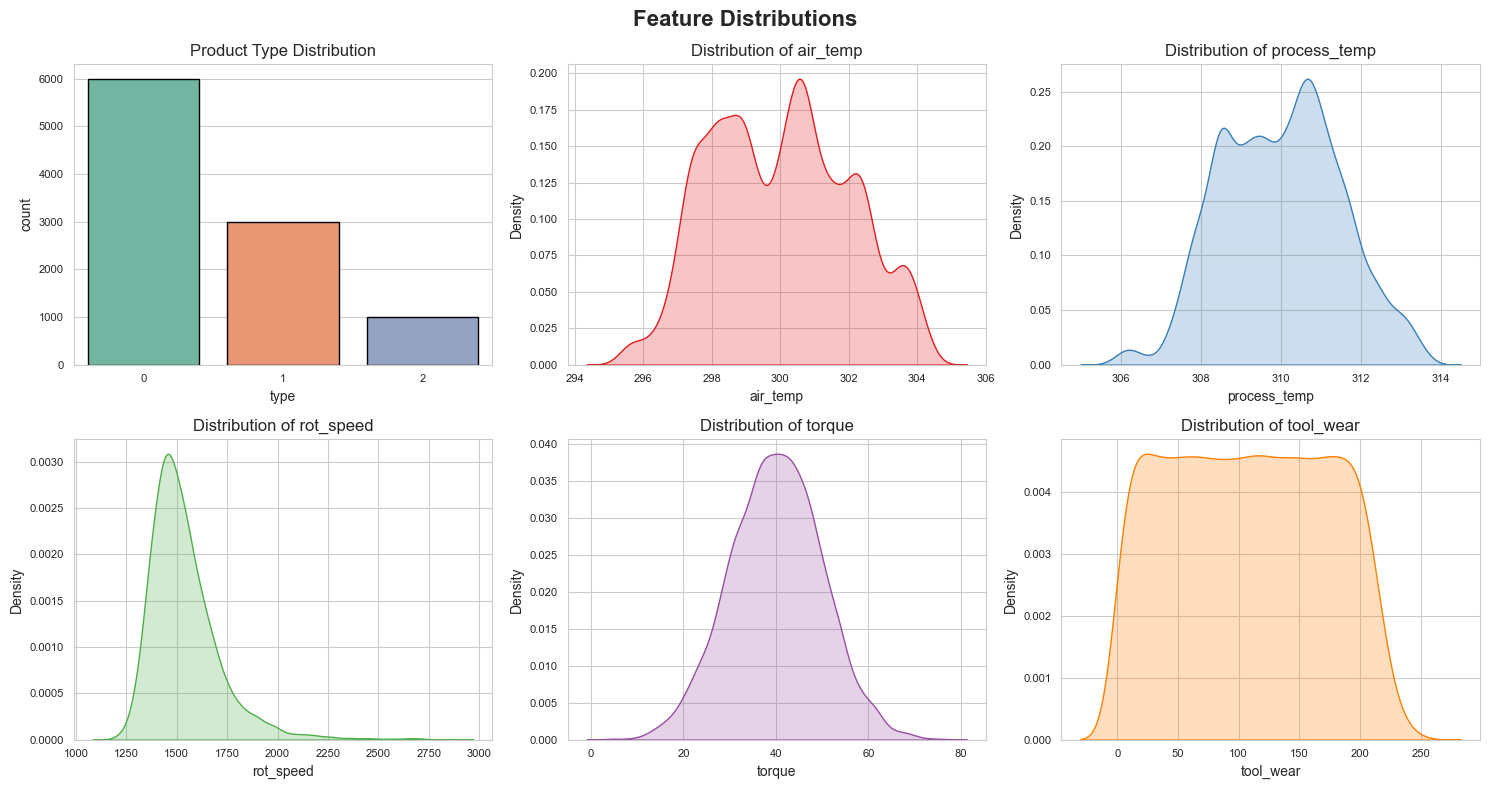

In [59]:
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Features to plot
numeric_features = ['air_temp', 'process_temp', 'rot_speed', 'torque', 'tool_wear']
categorical_feature = 'type'

# Setup figure
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Plot categorical first
sns.countplot(
    x=categorical_feature, 
    data=df, 
    palette='Set2', 
    edgecolor='black', 
    ax=axes[0]
)
axes[0].set_title('Product Type Distribution', fontsize=12)

# Plot numeric as KDE
for i, feature in enumerate(numeric_features, start=1):
    sns.kdeplot(
        data=df, 
        x=feature, 
        fill=True, 
        common_norm=False,
        color=sns.color_palette("Set1")[i-1],
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {feature}', fontsize=12)

# Clean up
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.suptitle('Feature Distributions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


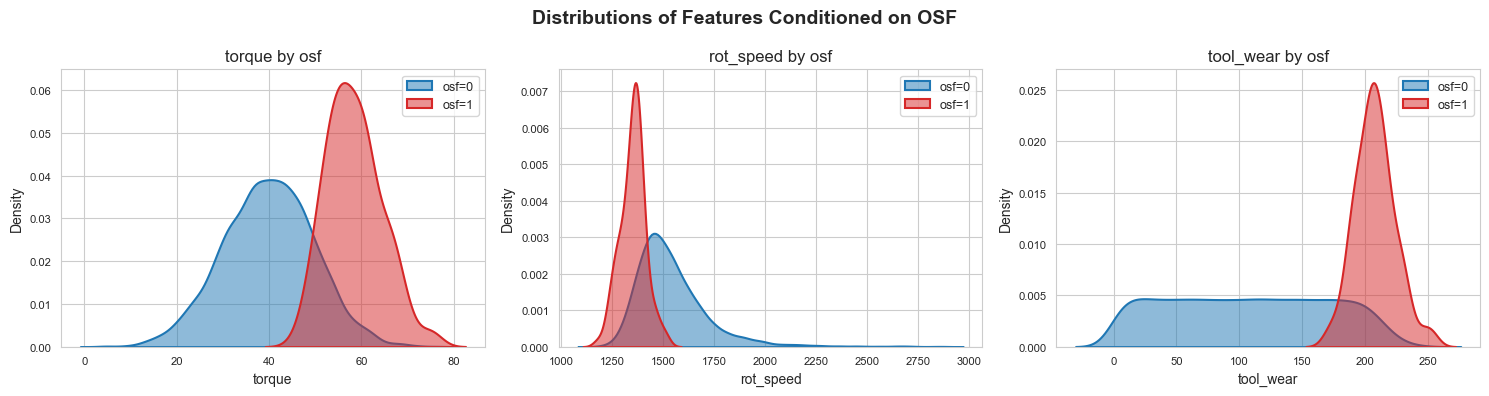

In [60]:
# Set style
sns.set_style("whitegrid")

# Features of interest
features_osf = ['torque', 'rot_speed', 'tool_wear']
target = 'osf'

# Setup figure
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()

colors = ['#1f77b4', '#d62728']  # Blue for 0, Red for 1

for i, feature in enumerate(features_osf):
    sns.kdeplot(
        data=df[df[target]==0],
        x=feature,
        fill=True,
        alpha=0.5,
        linewidth=1.5,
        label=f"{target}=0",
        color=colors[0],
        ax=axes[i]
    )
    sns.kdeplot(
        data=df[df[target]==1],
        x=feature,
        fill=True,
        alpha=0.5,
        linewidth=1.5,
        label=f"{target}=1",
        color=colors[1],
        ax=axes[i]
    )
    axes[i].set_title(f"{feature} by {target}", fontsize=12)
    axes[i].legend(fontsize=9)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

plt.suptitle(f'Distributions of Features Conditioned on {target.upper()}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [61]:
from scipy.stats import mannwhitneyu
import pandas as pd

features_osf = ['torque', 'rot_speed', 'tool_wear']
target = 'osf'

results = []

for feature in features_osf:
    stat, p = mannwhitneyu(
        df[df[target] == 1][feature],
        df[df[target] == 0][feature],
        alternative='two-sided'
    )
    results.append((feature, stat, p))

test_results = pd.DataFrame(results, columns=['Feature', 'U Statistic', 'p-value'])
test_results['Significant (p < 0.05)'] = test_results['p-value'] < 0.05

print(test_results)


     Feature  U Statistic       p-value  Significant (p < 0.05)
0     torque     922974.5  1.798704e-53                    True
1  rot_speed     103655.5  4.842865e-41                    True
2  tool_wear     916387.5  6.276716e-52                    True


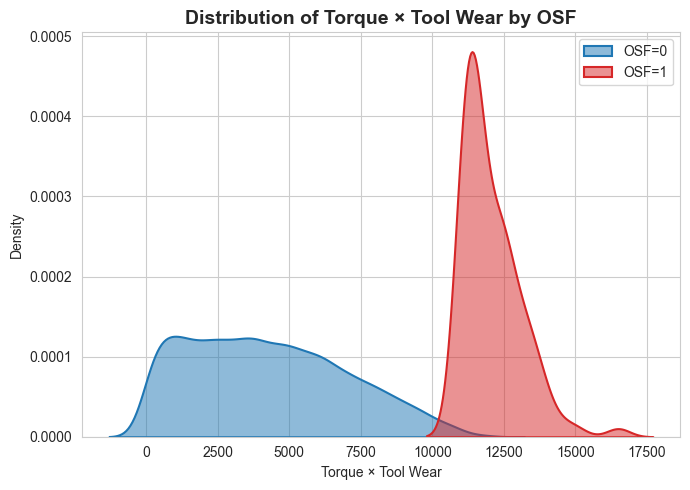

In [62]:
# Create the new interaction feature: torque_wear
df['torque_wear'] = df['torque'] * df['tool_wear']


# Set style
sns.set_style("whitegrid")

# Plot torque_wear KDE split by OSF
plt.figure(figsize=(7, 5))
sns.kdeplot(
    data=df[df['osf']==0],
    x='torque_wear',
    fill=True,
    alpha=0.5,
    linewidth=1.5,
    label="OSF=0",
    color='#1f77b4'
)
sns.kdeplot(
    data=df[df['osf']==1],
    x='torque_wear',
    fill=True,
    alpha=0.5,
    linewidth=1.5,
    label="OSF=1",
    color='#d62728'
)

plt.title("Distribution of Torque × Tool Wear by OSF", fontsize=14, fontweight='bold')
plt.xlabel("Torque × Tool Wear")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


In [63]:
# Define the failure mode columns
failure_modes = ['twf', 'hdf', 'pwf', 'osf', 'rnf']

# How many rows have twf=1
total_twf = df['twf'].sum()

# How many of those have at least one other failure mode also 1
twf_and_others = df[(df['twf'] == 1) & (df[failure_modes].sum(axis=1) > 1)].shape[0]

# Optional: breakdown by which modes co-occur
co_occur_breakdown = (
    df[df['twf'] == 1][failure_modes]
    .sum()
    .astype(int)
    .to_frame(name='Count')
)
co_occur_breakdown['Count (excluding TWF)'] = co_occur_breakdown['Count'] - df['twf'].sum()
co_occur_breakdown = co_occur_breakdown.drop(index='twf')

# Print results
print(f"Total TWF instances: {total_twf}")
print(f"TWF with at least one other mode: {twf_and_others} ({twf_and_others/total_twf:.2%})")
print("\nBreakdown of other modes among TWF instances:")
print(co_occur_breakdown)


Total TWF instances: 46
TWF with at least one other mode: 4 (8.70%)

Breakdown of other modes among TWF instances:
     Count  Count (excluding TWF)
hdf      0                    -46
pwf      1                    -45
osf      3                    -43
rnf      1                    -45


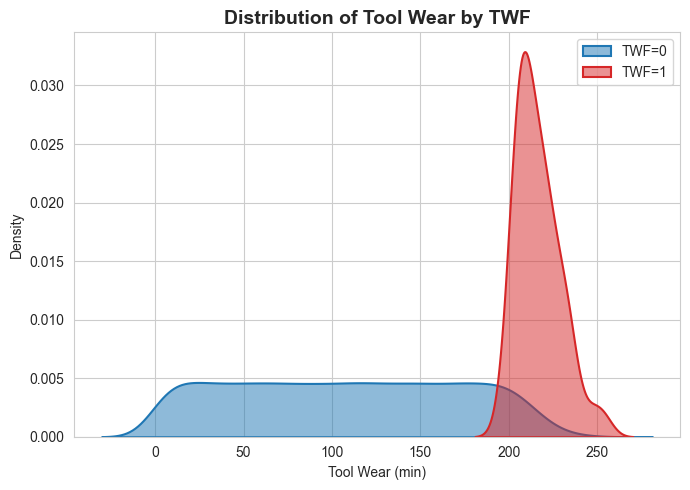

In [64]:
# Set style
sns.set_style("whitegrid")

# Plot KDE
plt.figure(figsize=(7, 5))
sns.kdeplot(
    data=df[df['twf']==0],
    x='tool_wear',
    fill=True,
    alpha=0.5,
    linewidth=1.5,
    label="TWF=0",
    color='#1f77b4'
)
sns.kdeplot(
    data=df[df['twf']==1],
    x='tool_wear',
    fill=True,
    alpha=0.5,
    linewidth=1.5,
    label="TWF=1",
    color='#d62728'
)

plt.title("Distribution of Tool Wear by TWF", fontsize=14, fontweight='bold')
plt.xlabel("Tool Wear (min)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

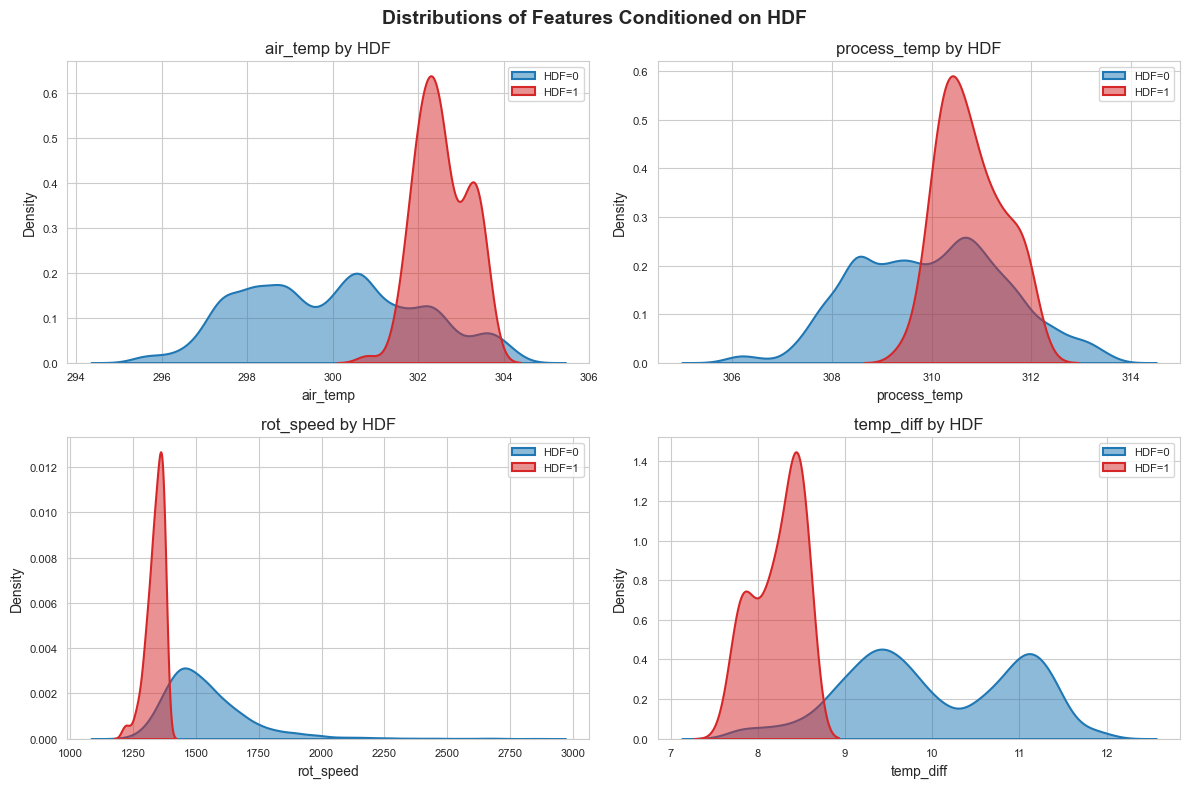

In [65]:
# Engineer temp_diff
df['temp_diff'] = df['process_temp'] - df['air_temp']

# Features to plot
features_hdf = ['air_temp', 'process_temp', 'rot_speed', 'temp_diff']

# Set style
sns.set_style("whitegrid")

# Setup figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

colors = ['#1f77b4', '#d62728']  # Blue: HDF=0, Red: HDF=1

for i, feature in enumerate(features_hdf):
    sns.kdeplot(
        data=df[df['hdf']==0],
        x=feature,
        fill=True,
        alpha=0.5,
        linewidth=1.5,
        label="HDF=0",
        color=colors[0],
        ax=axes[i]
    )
    sns.kdeplot(
        data=df[df['hdf']==1],
        x=feature,
        fill=True,
        alpha=0.5,
        linewidth=1.5,
        label="HDF=1",
        color=colors[1],
        ax=axes[i]
    )
    axes[i].set_title(f"{feature} by HDF", fontsize=12)
    axes[i].legend(fontsize=8)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

plt.suptitle("Distributions of Features Conditioned on HDF", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [66]:
epsilon = 1e-6
df['heating_risk'] = 1 / ((df['temp_diff'] + epsilon) * (df['rot_speed'] + epsilon))

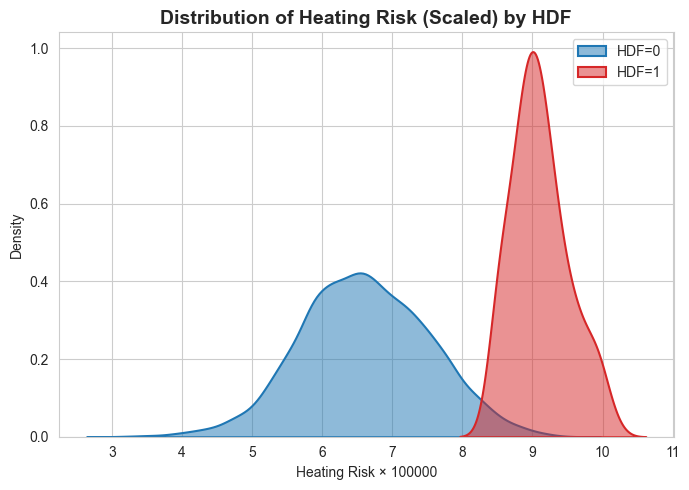

In [67]:
# Scale factor
scale_factor = 1e5

# Rescale heating_risk
df['heating_risk_scaled'] = df['heating_risk'] * scale_factor
df.drop(columns=['heating_risk'], inplace=True)

# Plot scaled heating_risk by HDF
plt.figure(figsize=(7, 5))
sns.kdeplot(
    data=df[df['hdf']==0],
    x='heating_risk_scaled',
    fill=True,
    alpha=0.5,
    linewidth=1.5,
    label="HDF=0",
    color='#1f77b4'
)
sns.kdeplot(
    data=df[df['hdf']==1],
    x='heating_risk_scaled',
    fill=True,
    alpha=0.5,
    linewidth=1.5,
    label="HDF=1",
    color='#d62728'
)

plt.title("Distribution of Heating Risk (Scaled) by HDF", fontsize=14, fontweight='bold')
plt.xlabel(f"Heating Risk × {int(scale_factor)}")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


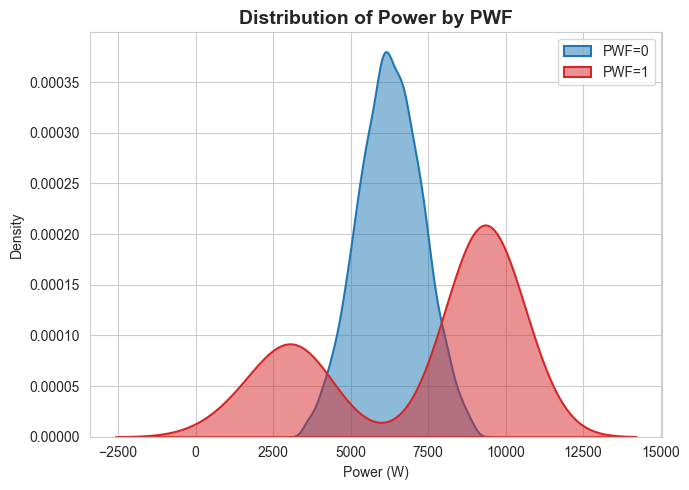

In [68]:
# Engineer power: torque × angular velocity (rad/s)
df['power'] = df['torque'] * df['rot_speed'] * 0.10472  # 2π/60 ≈ 0.10472

# Plot KDE of power by PWF
plt.figure(figsize=(7, 5))
sns.kdeplot(
    data=df[df['pwf']==0],
    x='power',
    fill=True,
    alpha=0.5,
    linewidth=1.5,
    label="PWF=0",
    color='#1f77b4'
)
sns.kdeplot(
    data=df[df['pwf']==1],
    x='power',
    fill=True,
    alpha=0.5,
    linewidth=1.5,
    label="PWF=1",
    color='#d62728'
)

plt.title("Distribution of Power by PWF", fontsize=14, fontweight='bold')
plt.xlabel("Power (W)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

In [69]:
df1 = df.copy()

In [70]:
df1.columns

Index(['type', 'air_temp', 'process_temp', 'rot_speed', 'torque', 'tool_wear',
       'machine_failure', 'twf', 'hdf', 'pwf', 'osf', 'rnf',
       'failure_mode_count', 'torque_wear', 'temp_diff', 'heating_risk_scaled',
       'power'],
      dtype='object')

In [71]:
df1.drop('failure_mode_count', axis=1, inplace=True)

In [72]:
from sklearn.model_selection import train_test_split

# Define features and targets
targets = ['twf', 'hdf', 'pwf', 'osf', 'rnf']
X = df1.drop(columns=['machine_failure'] + targets)
y = df1[targets]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(8000, 10) (2000, 10)
(8000, 5) (2000, 5)


In [73]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Store models & predictions
models = {}
preds = pd.DataFrame(index=y_test.index)

print("\n Training LightGBM one-vs-all ensemble…")

for target in y_train.columns:
    print(f"\n=== Training for {target.upper()} ===")
    clf = LGBMClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=200,
        learning_rate=0.05,
        verbose=-1
    )
    clf.fit(X_train, y_train[target])
    y_pred = clf.predict(X_test)
    preds[target] = y_pred
    models[target] = clf

    print(classification_report(
        y_test[target], y_pred, digits=4
    ))





 Training LightGBM one-vs-all ensemble…

=== Training for TWF ===
              precision    recall  f1-score   support

           0     0.9950    0.9960    0.9955      1989
           1     0.1111    0.0909    0.1000        11

    accuracy                         0.9910      2000
   macro avg     0.5530    0.5434    0.5477      2000
weighted avg     0.9901    0.9910    0.9906      2000


=== Training for HDF ===
              precision    recall  f1-score   support

           0     0.9990    1.0000    0.9995      1983
           1     1.0000    0.8824    0.9375        17

    accuracy                         0.9990      2000
   macro avg     0.9995    0.9412    0.9685      2000
weighted avg     0.9990    0.9990    0.9990      2000


=== Training for PWF ===
              precision    recall  f1-score   support

           0     1.0000    0.9985    0.9992      1980
           1     0.8696    1.0000    0.9302        20

    accuracy                         0.9985      2000
   macro 

In [74]:
from sklearn.metrics import hamming_loss

# Compute Hamming Loss & Score
hl = hamming_loss(y_test, preds)
hs = 1 - hl

print(f"Hamming Loss: {hl:.4f}")
print(f"Hamming Score: {hs:.4f}")


Hamming Loss: 0.0034
Hamming Score: 0.9966


In [75]:
from sklearn.metrics import f1_score

# y_test and preds are your true and predicted labels DataFrames

# Micro F1: aggregates contributions of all classes to compute average metric
micro_f1 = f1_score(y_test, preds, average='micro')

# Macro F1: computes metric independently for each class, then takes average
macro_f1 = f1_score(y_test, preds, average='macro')

print(f"Micro F1 score: {micro_f1:.4f}")
print(f"Macro F1 score: {macro_f1:.4f}")


Micro F1 score: 0.7571
Macro F1 score: 0.5679


In [76]:
import joblib
for target, model in models.items():
    joblib.dump(model, f"lgbm_{target}.joblib")


In [77]:
df1.columns

Index(['type', 'air_temp', 'process_temp', 'rot_speed', 'torque', 'tool_wear',
       'machine_failure', 'twf', 'hdf', 'pwf', 'osf', 'rnf', 'torque_wear',
       'temp_diff', 'heating_risk_scaled', 'power'],
      dtype='object')

Best threshold: 0.01
Best F1 score: 0.1613


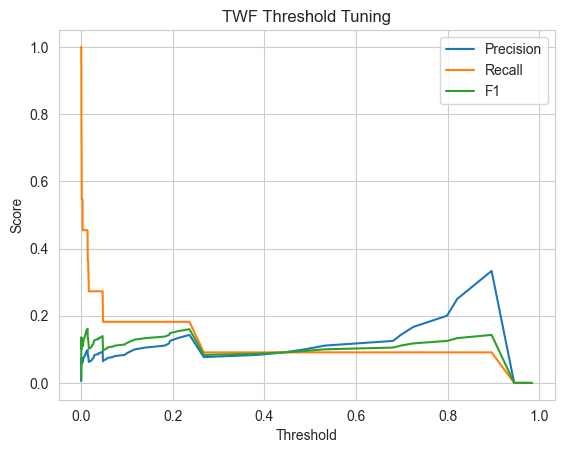

In [78]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

y_true = y_test['twf']
y_probs = models['twf'].predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_true, y_probs)

f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

best_idx = np.argmax(f1s)
best_threshold = thresholds[best_idx]

print(f"Best threshold: {best_threshold:.2f}")
print(f"Best F1 score: {f1s[best_idx]:.4f}")


plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.plot(thresholds, f1s[:-1], label='F1')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('TWF Threshold Tuning')
plt.show()


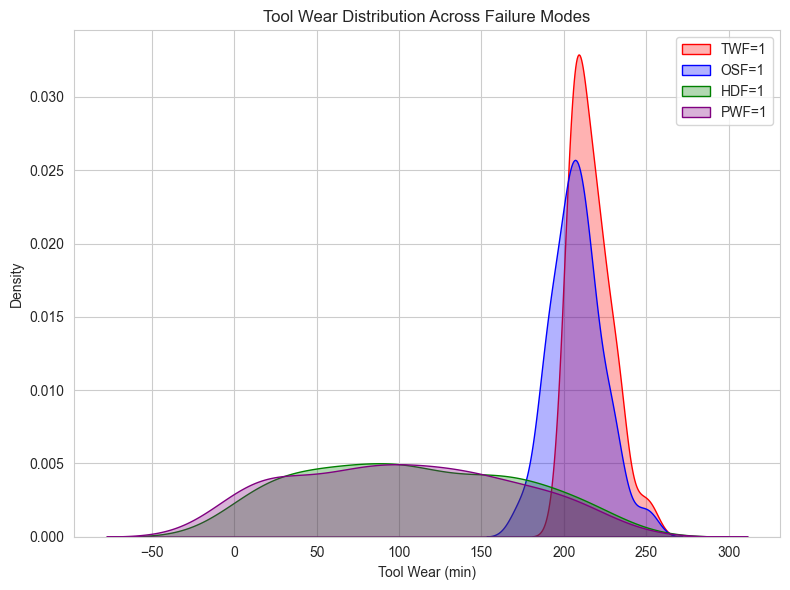

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Plot TWF
sns.kdeplot(
    df[df['twf']==1]['tool_wear'],
    label='TWF=1',
    color='red',
    fill=True,
    alpha=0.3
)

# Plot OSF
sns.kdeplot(
    df[df['osf']==1]['tool_wear'],
    label='OSF=1',
    color='blue',
    fill=True,
    alpha=0.3
)

# Plot HDF
sns.kdeplot(
    df[df['hdf']==1]['tool_wear'],
    label='HDF=1',
    color='green',
    fill=True,
    alpha=0.3
)

# Plot PWF
sns.kdeplot(
    df[df['pwf']==1]['tool_wear'],
    label='PWF=1',
    color='purple',
    fill=True,
    alpha=0.3
)

plt.title('Tool Wear Distribution Across Failure Modes')
plt.xlabel('Tool Wear (min)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [80]:
df1.columns

Index(['type', 'air_temp', 'process_temp', 'rot_speed', 'torque', 'tool_wear',
       'machine_failure', 'twf', 'hdf', 'pwf', 'osf', 'rnf', 'torque_wear',
       'temp_diff', 'heating_risk_scaled', 'power'],
      dtype='object')

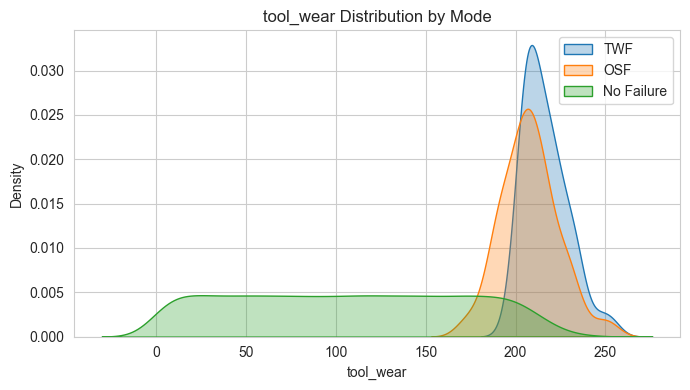

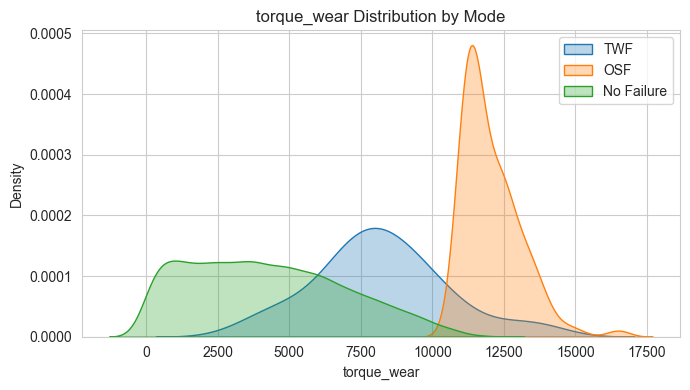

In [81]:
modes = {
    'TWF': df1['twf'] == 1,
    'OSF': df1['osf'] == 1,
    'No Failure': df1['machine_failure'] == 0
}

for feat in ['tool_wear', 'torque_wear']:
    plt.figure(figsize=(7,4))
    for name, mask in modes.items():
        sns.kdeplot(
            df1.loc[mask, feat],
            label=name,
            fill=True,
            alpha=0.3
        )
    plt.title(f"{feat} Distribution by Mode")
    plt.xlabel(feat)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [82]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, hamming_loss

# --- 1. Prep & split --------------------------------------------------------

# df1 should already exist with all your features + targets
# including 'tool_wear', 'torque_wear', 'twf', 'osf', 'hdf', 'pwf', 'rnf'

# Features for HDF/PWF models
features = [
    'type','air_temp','process_temp','rot_speed',
    'torque','tool_wear','torque_wear','temp_diff',
    'heating_risk_scaled','power'
]

X = df1[features]
y = df1[['twf','osf','hdf','pwf','rnf']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y['twf']|y['osf']
)

# --- 2. Derive thresholds from TRAIN ---------------------------------------

# TWF wear‐range
twf_train_wear = X_train.loc[y_train['twf']==1, 'tool_wear']
wear_low, wear_high = twf_train_wear.min(), twf_train_wear.max()

# OSF torque_wear threshold
osf_train_tw = X_train.loc[y_train['osf']==1, 'torque_wear']
osf_thr = osf_train_tw.min()

print(f"Learned TWF wear range: [{wear_low:.1f}, {wear_high:.1f}]")
print(f"Learned OSF torque_wear threshold: {osf_thr:.1f}")

# --- 3. Rule-based TWF / OSF on TEST --------------------------------------

# Rule for TWF: in the wear window, but below OSF torque_wear
twf_pred = (
    (X_test['tool_wear'] >= wear_low) &
    (X_test['tool_wear'] <= wear_high) &
    (X_test['torque_wear'] < osf_thr)
).astype(int)

# Rule for OSF: torque_wear ≥ osf_thr
osf_pred = (X_test['torque_wear'] >= osf_thr).astype(int)

# --- 4. Model HDF & PWF (RNF=0) ---------------------------------------------

clf_hdf = LGBMClassifier(random_state=42, class_weight='balanced')
clf_pwf = LGBMClassifier(random_state=42, class_weight='balanced')

clf_hdf.fit(X_train, y_train['hdf'])
clf_pwf.fit(X_train, y_train['pwf'])

hdf_pred = clf_hdf.predict(X_test)
pwf_pred = clf_pwf.predict(X_test)
rnf_pred = np.zeros(len(X_test), dtype=int)

# --- 5. Assemble & evaluate -----------------------------------------------

preds = pd.DataFrame({
    'twf': twf_pred,
    'osf': osf_pred,
    'hdf': hdf_pred,
    'pwf': pwf_pred,
    'rnf': rnf_pred
}, index=y_test.index)

print("\n=== Learned‐Rule + Model Classification Reports ===\n")
for mode in ['twf','osf','hdf','pwf','rnf']:
    print(f"--- {mode.upper()} ---")
    print(classification_report(y_test[mode], preds[mode], digits=4))

hl = hamming_loss(y_test[['twf','hdf','pwf','osf','rnf']], preds)
print(f"Hamming Loss:  {hl:.4f}")
print(f"Hamming Score: {1 - hl:.4f}")


Learned TWF wear range: [200.0, 253.0]
Learned OSF torque_wear threshold: 11003.2

=== Learned‐Rule + Model Classification Reports ===

--- TWF ---
              precision    recall  f1-score   support

           0     0.9989    0.9312    0.9639      1991
           1     0.0486    0.7778    0.0915         9

    accuracy                         0.9305      2000
   macro avg     0.5238    0.8545    0.5277      2000
weighted avg     0.9946    0.9305    0.9599      2000

--- OSF ---
              precision    recall  f1-score   support

           0     1.0000    0.9965    0.9982      1980
           1     0.7407    1.0000    0.8511        20

    accuracy                         0.9965      2000
   macro avg     0.8704    0.9982    0.9246      2000
weighted avg     0.9974    0.9965    0.9968      2000

--- HDF ---
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1985
           1     1.0000    1.0000    1.0000        15

    accura

In [83]:
import pandas as pd

# --- assume you already have these ---
# y_test: DataFrame with columns ['twf','osf','hdf','pwf','rnf']
# preds:  DataFrame with same columns, your model’s predictions

# Build an error‐analysis table for true TWF cases
error_df = y_test[['twf']].copy()
error_df['pred_twf'] = preds['twf']
error_df['pred_osf'] = preds['osf']
error_df['pred_hdf'] = preds['hdf']
error_df['pred_pwf'] = preds['pwf']
error_df['pred_rnf'] = preds['rnf']

true_twf = error_df[error_df['twf'] == 1]

summary = {
    'True TWF instances': len(true_twf),
    'Correctly Predicted TWF': int((true_twf['pred_twf'] == 1).sum()),
    'Predicted as OSF':        int((true_twf['pred_osf'] == 1).sum()),
    'Predicted as HDF':        int((true_twf['pred_hdf'] == 1).sum()),
    'Predicted as PWF':        int((true_twf['pred_pwf'] == 1).sum()),
    'Predicted as RNF':        int((true_twf['pred_rnf'] == 1).sum()),
    'Not Predicted (all 0)':   int((true_twf[['pred_twf','pred_osf','pred_hdf','pred_pwf','pred_rnf']].sum(axis=1) == 0).sum())
}

summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Count'])
print(summary_df)


                         Count
True TWF instances           9
Correctly Predicted TWF      7
Predicted as OSF             1
Predicted as HDF             0
Predicted as PWF             0
Predicted as RNF             0
Not Predicted (all 0)        1


In [84]:
import pandas as pd

# --- assume y_test and preds exist ---
# y_test: DataFrame with columns ['twf','osf','hdf','pwf','rnf']
# preds:  DataFrame with same columns (your predictions)

# Build a DataFrame of interest
fp_df = y_test.copy()
fp_df['pred_twf'] = preds['twf']

# Filter false positives: predicted TWF but not actually TWF
fp_df = fp_df[(fp_df['pred_twf'] == 1) & (fp_df['twf'] == 0)]

# Determine the true mode for each false positive
def classify_true_mode(row):
    if row['osf'] == 1: return 'OSF'
    if row['hdf'] == 1: return 'HDF'
    if row['pwf'] == 1: return 'PWF'
    if row['rnf'] == 1: return 'RNF'
    return 'NO FAILURE'

fp_df['True Mode'] = fp_df.apply(classify_true_mode, axis=1)

# Summarize counts
fp_summary = fp_df['True Mode'].value_counts().rename_axis('True Mode').reset_index(name='Count')

print(fp_summary)


    True Mode  Count
0  NO FAILURE    135
1         HDF      1
2         RNF      1


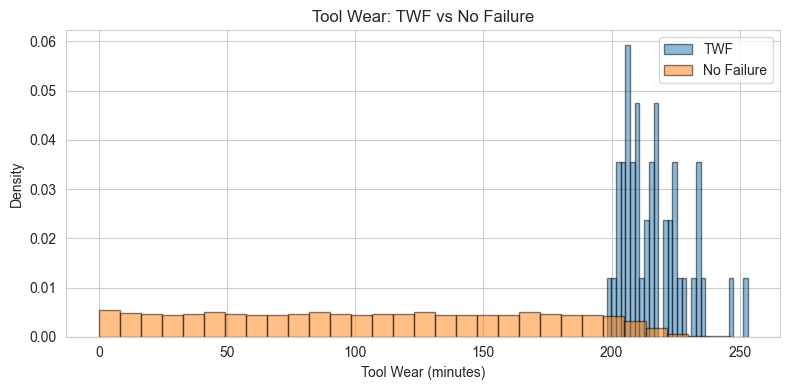

In [85]:
# Extract the two series
twf_wear    = df1.loc[df1['twf'] == 1, 'tool_wear']
nofail_wear = df1.loc[df1['machine_failure'] == 0, 'tool_wear']

# Plot density histograms
plt.figure(figsize=(8, 4))
plt.hist(twf_wear,    bins=30, density=True, alpha=0.5, label='TWF',      edgecolor='black')
plt.hist(nofail_wear, bins=30, density=True, alpha=0.5, label='No Failure', edgecolor='black')
plt.title('Tool Wear: TWF vs No Failure')
plt.xlabel('Tool Wear (minutes)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

In [86]:
tp_mask = (y_test['twf'] == 1) & (preds['twf'] == 1)
fp_mask = (y_test['twf'] == 0) & (preds['twf'] == 1)

# 2. Extract the corresponding tool_wear values
tp_wears = X_test.loc[tp_mask, 'tool_wear']
fp_wears = X_test.loc[fp_mask, 'tool_wear']

# 3. Inspect the raw values
print("True Positive tool_wear values:")
print(tp_wears.values)

print("\nFalse Positive tool_wear values:")
print(fp_wears.values)

# 4. (Optional) Summary statistics
print("\nSummary for TP tool_wear:")
print(tp_wears.describe())

print("\nSummary for FP tool_wear:")
print(fp_wears.describe())

True Positive tool_wear values:
[222 210 209 222 215 227 206]

False Positive tool_wear values:
[223 241 215 203 204 219 201 218 215 211 219 215 213 201 203 207 228 205
 244 207 202 222 209 203 208 203 200 200 200 208 209 239 223 201 229 204
 201 203 209 201 211 219 225 200 202 210 217 244 200 200 207 215 207 201
 210 208 219 213 207 207 203 205 201 221 205 215 231 215 208 205 210 223
 214 221 215 205 219 207 211 202 226 206 219 207 204 242 202 210 217 203
 200 204 210 203 210 208 204 201 206 222 214 200 203 216 206 204 213 213
 213 218 207 202 200 211 214 202 200 223 204 226 223 212 203 210 240 217
 208 203 235 206 203 203 209 240 231 212 208]

Summary for TP tool_wear:
count      7.000000
mean     215.857143
std        7.946248
min      206.000000
25%      209.500000
50%      215.000000
75%      222.000000
max      227.000000
Name: tool_wear, dtype: float64

Summary for FP tool_wear:
count    137.000000
mean     211.532847
std       10.578871
min      200.000000
25%      203.000000
5

In [87]:
# 1. Masks for True Positives (TP) and False Positives (FP) of TWF
tp_mask = (y_test['twf'] == 1) & (preds['twf'] == 1)
fp_mask = (y_test['twf'] == 0) & (preds['twf'] == 1)

# 2. Extract the 'type' column for each group
tp_types = X_test.loc[tp_mask, 'type']
fp_types = X_test.loc[fp_mask, 'type']

# 3. Print out value counts
print("TP — product type distribution:")
print(tp_types.value_counts())

print("\nFP — product type distribution:")
print(fp_types.value_counts())


TP — product type distribution:
type
0    3
2    2
1    2
Name: count, dtype: int64

FP — product type distribution:
type
0    88
1    42
2     7
Name: count, dtype: int64


In [88]:
df2 = df1.copy()

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, hamming_loss

# --- 0. Assume df1 is already loaded in your environment with columns:
# ['type','air_temp','process_temp','rot_speed','torque','tool_wear',
#  'machine_failure','twf','hdf','pwf','osf','rnf',
#  'torque_wear','temp_diff','heating_risk_scaled','power']

# --- 1. Add the wear_by_type feature ---------------------------------------
df2 = df1.copy()
df2['wear_by_type'] = df2['tool_wear'] * df2['type']

# --- 2. Prepare feature matrix X and target DataFrame y --------------------
features = [
    'type', 'air_temp', 'process_temp', 'rot_speed',
    'torque', 'tool_wear', 'torque_wear',
    'temp_diff', 'heating_risk_scaled', 'power',
    'wear_by_type'
]
targets = ['twf', 'hdf', 'pwf', 'osf', 'rnf']

X = df2[features]
y = df2[targets]

# --- 3. Split into train/test ----------------------------------------------
# stratify on any wear-related failure so both twf & osf are balanced
stratify_col = (y['twf'] | y['osf']).astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=stratify_col
)

# --- 4. Train LightGBM one-vs-all ensemble --------------------------------
models = {}
preds = pd.DataFrame(index=y_test.index)

print("\nTraining LightGBM one-vs-all ensemble…")
for target in targets:
    print(f"\n=== Training for {target.upper()} ===")
    clf = LGBMClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=200,
        learning_rate=0.05,
        verbose=-1
    )
    clf.fit(X_train, y_train[target])
    y_pred = clf.predict(X_test)
    preds[target] = y_pred
    models[target] = clf

    print(classification_report(y_test[target], y_pred, digits=4))

# --- 5. Overall multi-label metric -----------------------------------------
hl = hamming_loss(y_test, preds)
print(f"\nOverall Hamming Score: {1 - hl:.4f}")



Training LightGBM one-vs-all ensemble…

=== Training for TWF ===
              precision    recall  f1-score   support

           0     0.9960    0.9940    0.9950      1991
           1     0.0769    0.1111    0.0909         9

    accuracy                         0.9900      2000
   macro avg     0.5364    0.5525    0.5429      2000
weighted avg     0.9918    0.9900    0.9909      2000


=== Training for HDF ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1985
           1     1.0000    1.0000    1.0000        15

    accuracy                         1.0000      2000
   macro avg     1.0000    1.0000    1.0000      2000
weighted avg     1.0000    1.0000    1.0000      2000


=== Training for PWF ===
              precision    recall  f1-score   support

           0     0.9980    0.9980    0.9980      1976
           1     0.8333    0.8333    0.8333        24

    accuracy                         0.9960      2000
   macro a